# 1. Supervised Learning Problem Description
<b>Objective:</b> Predict whether a bank customer will subscribe to a term deposit based on various attributes.

<b>Dataset:</b> Bank Marketing Dataset from the UCI Machine Learning Repository.

# Attributes:

age : age of the customer. <br>
job : type of job (e.g. 'management', 'technician').<br>
marital : marital status.<br>
education: education level.<br>
balance: average yearly balance in euros.<br>

... and others.<br>

Target Variable: y - has the customer subscribed to a term deposit? (yes, no)

# 2. EDA Procedure

In [4]:
import pandas as pd

data = pd.read_csv('bank.csv',sep=";",quotechar='"')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

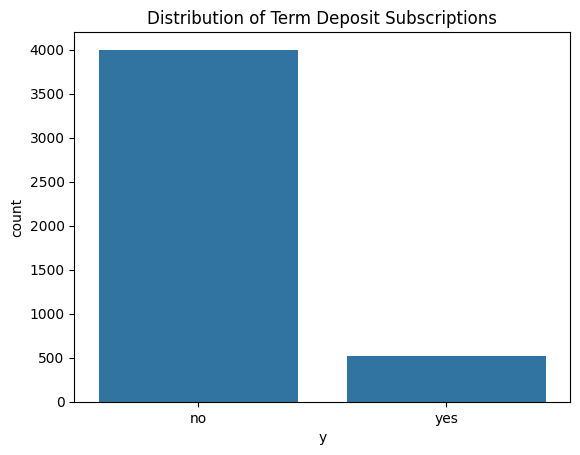

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='y')
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()


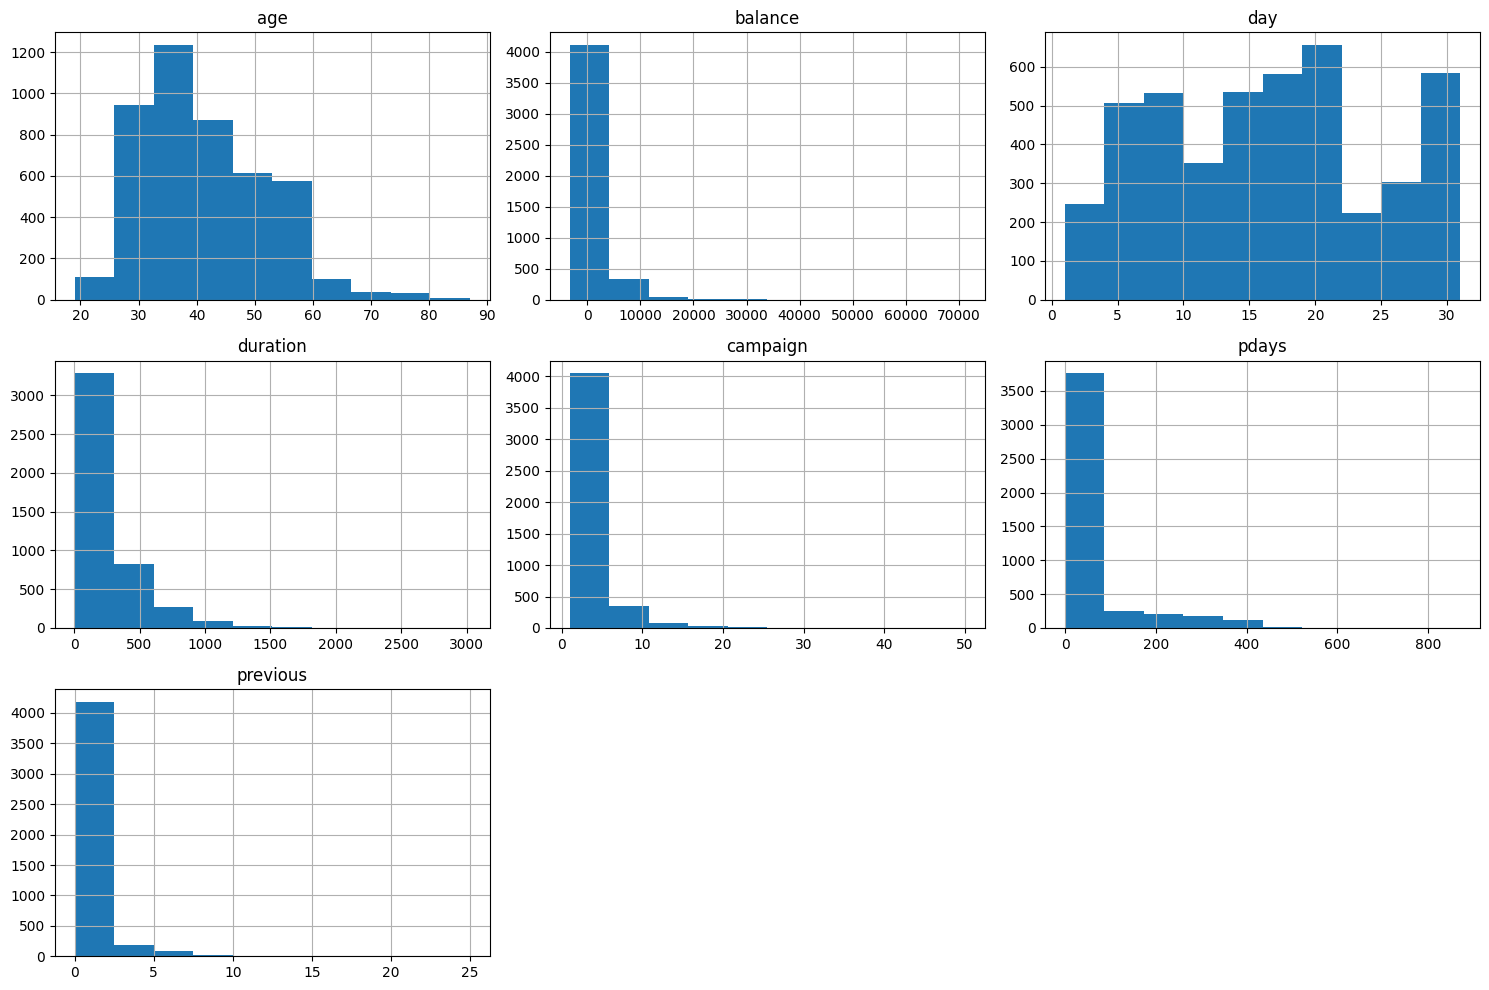

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


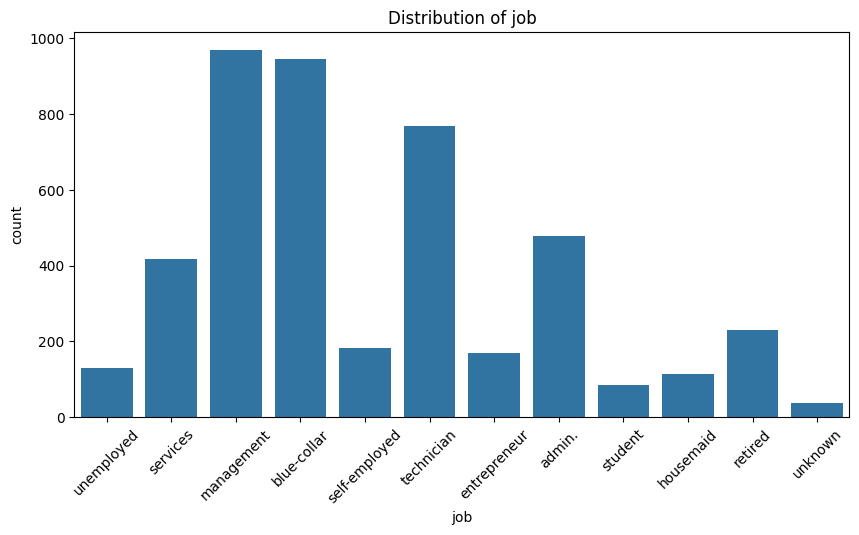

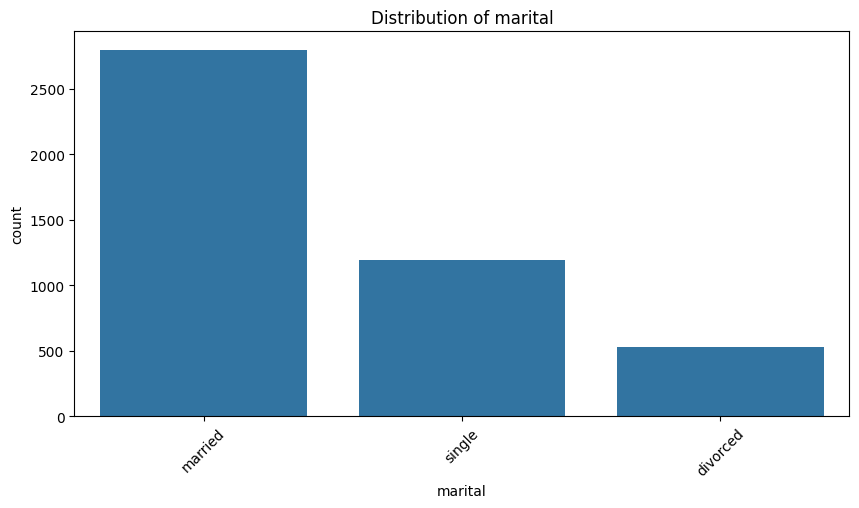

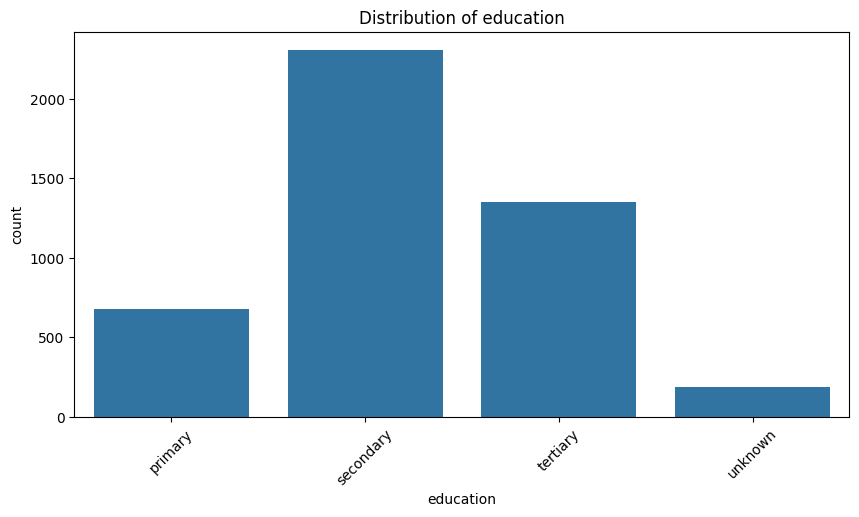

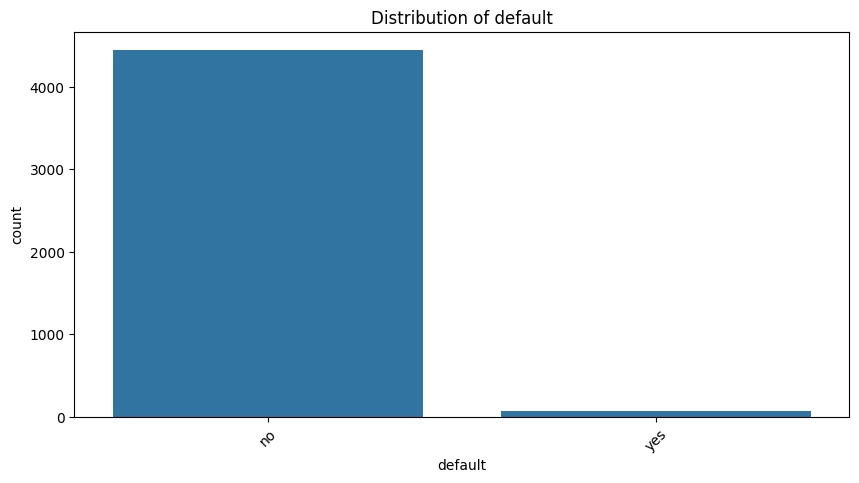

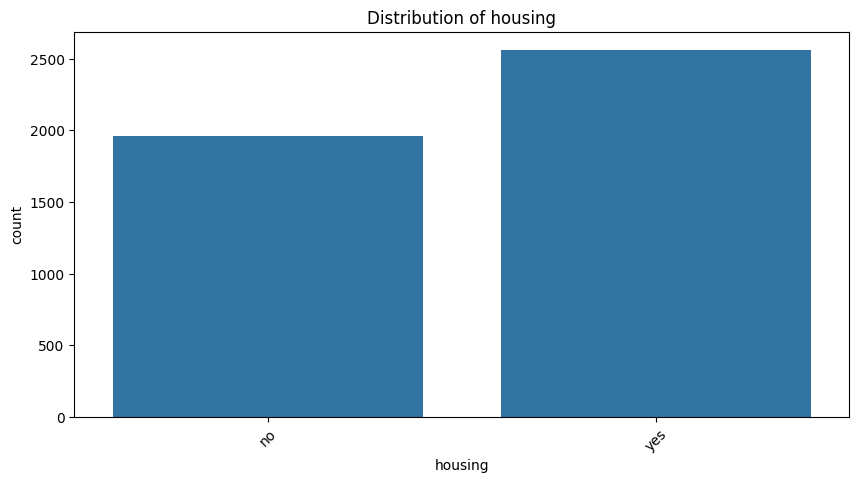

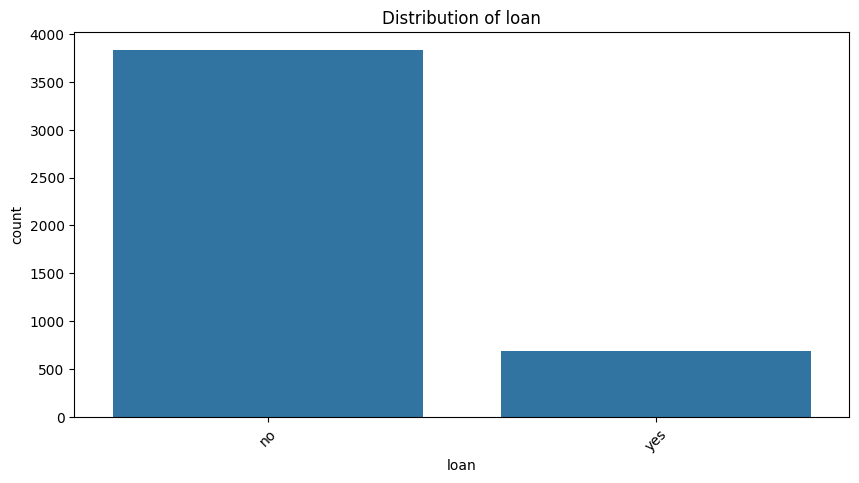

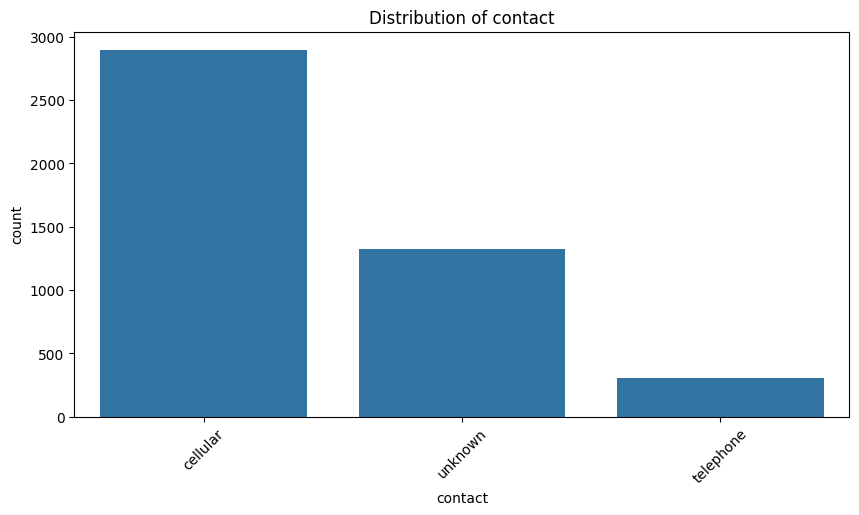

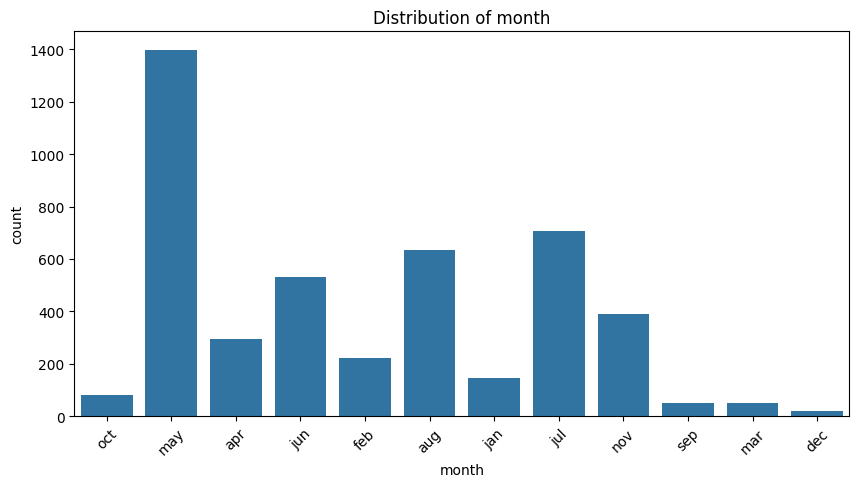

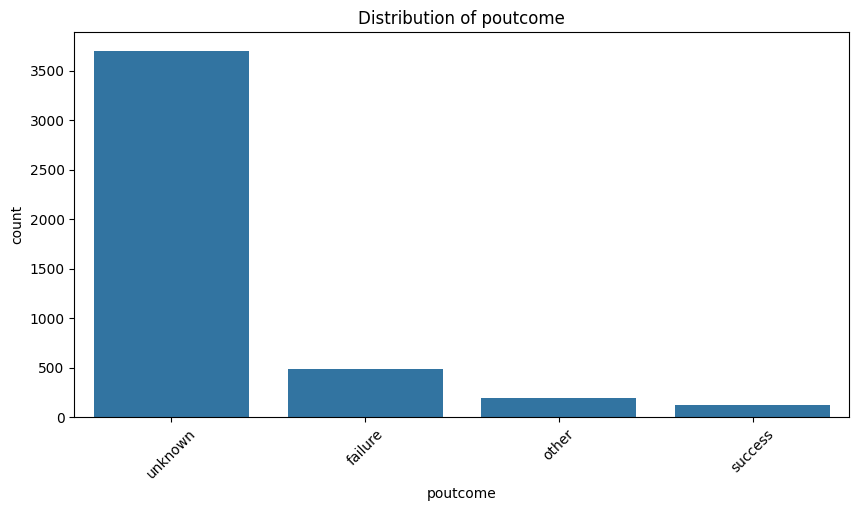

In [16]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


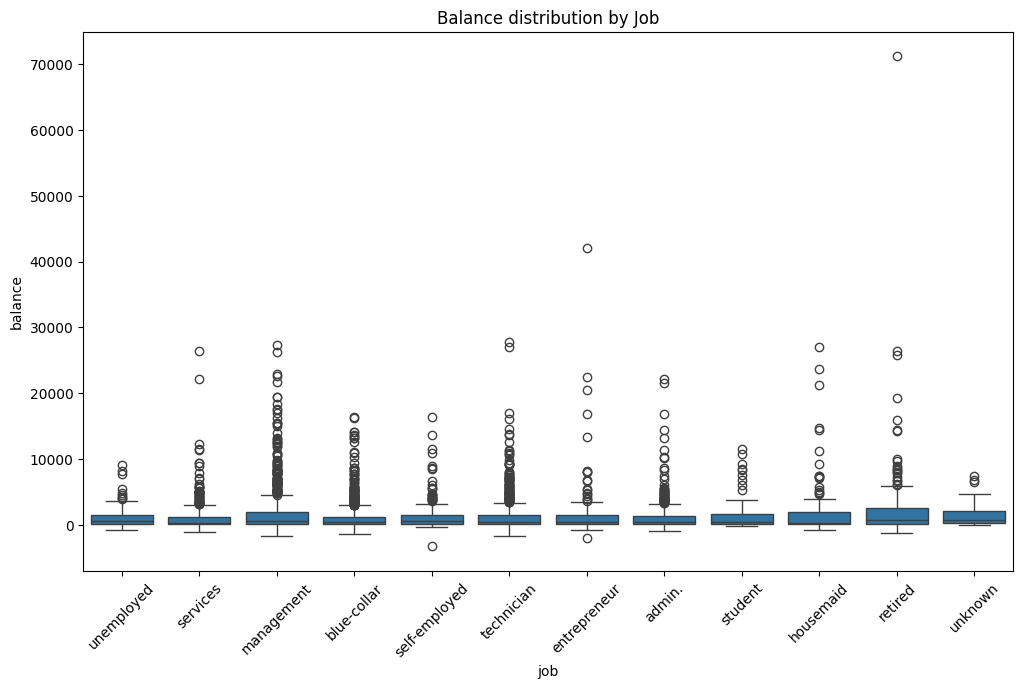

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='job', y='balance')
plt.title('Balance distribution by Job')
plt.xticks(rotation=45)
plt.show()


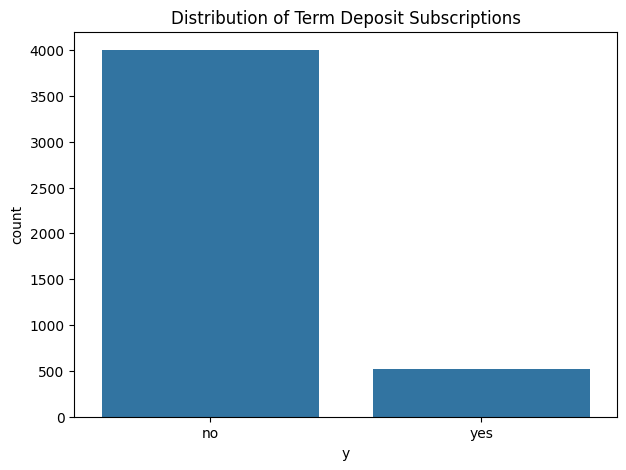

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='y')
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()


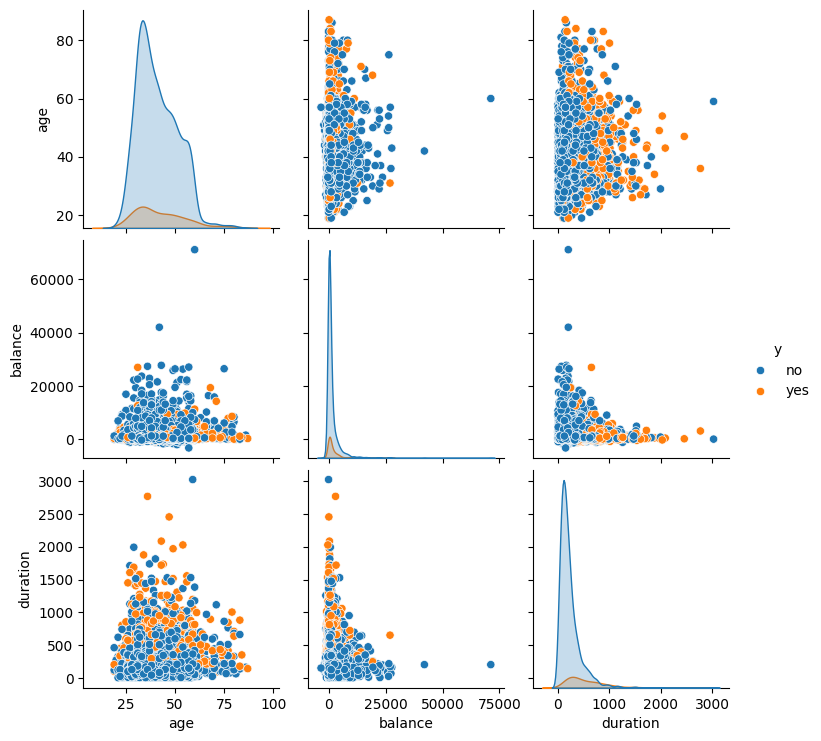

In [20]:
sns.pairplot(data[['age', 'balance', 'duration', 'y']], hue='y')
plt.show()


# 3. Analysis

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# One-hot encode categorical columns
X = pd.get_dummies(data.drop("y", axis=1), drop_first=True)

# Convert the target column 'y' to binary: 'yes' = 1, 'no' = 0
y = data['y'].map({'yes': 1, 'no': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       793
           1       0.62      0.22      0.33       112

    accuracy                           0.89       905
   macro avg       0.76      0.60      0.63       905
weighted avg       0.87      0.89      0.86       905



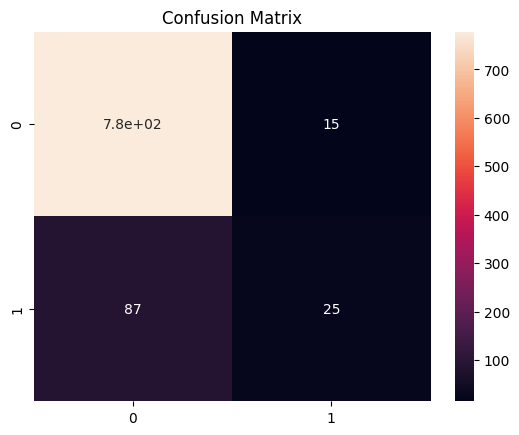

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()
